### Изучаем AUC для разных моделей
Ищем уровень дохода

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#Скачиваем данные из файла
data = pd.read_csv( 'adult.csv' )
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#Смотрим информацию о данных. В данном датасете пропусков нет, обработка NaN не требуется
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
# целевая переменная (столбец income) является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
le.fit( data['income'] )

LabelEncoder()

In [7]:
# записываем в переменную y преобразованный столбец income

Y = pd.Series( data = le.transform( data['income'] ) )
Y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [8]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'workclass', 'educational-num', 'relationship' ] ]

# столбцы 'workclass', 'relationship' является категориальными
# переведем их в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies( selectedColumns, columns = [ 'workclass', 'relationship' ] )

X.head()

,educational-num,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,7,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,9,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,12,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,10,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,10,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
#выбираем модель
model = LogisticRegression()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.9, random_state = 0)

In [11]:
# обучаем модель
model.fit( X_train, Y_train )
predictions = model.predict_proba( X_test )

In [12]:
predictions[:5]

array([[ 0.84160964,  0.15839036],
       [ 0.08468336,  0.91531664],
       [ 0.78734438,  0.21265562],
       [ 0.96027996,  0.03972004],
       [ 0.99864445,  0.00135555]])

In [13]:
# сравниваем факт с предсказаниями
# (да, сравнивать предсказания с самими данными не круто, лучше было разбить на обучающую и тестовую выборку)
# это будет в следующем занятии

zip( predictions[:, 1], Y )

In [15]:
model.score(X, Y)

0.82453625977642198

### ROC

In [16]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [17]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [18]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9394379281940297)
(0.00011983223487118035, 0.0034032898468519569, 0.93943792819402971)
(0.00011983223487118035, 0.0034978256759311778, 0.93640317704889375)
(0.00014979029358897544, 0.0044431839667233878, 0.92127041670352583)
(0.00014979029358897544, 0.0045377197958026095, 0.91740533484966824)
(0.0002696225284601558, 0.013613159387407828, 0.91531663755763892)
(0.0002696225284601558, 0.013802231045566269, 0.91118744342264657)
(0.00035949670461354102, 0.01559841179807147, 0.89075463463735327)
(0.00035949670461354102, 0.015692947627150691, 0.88557750453313888)
(0.00071899340922708204, 0.020892418226507847, 0.88278676452350957)
(0.00077890952666267229, 0.021932312346379278, 0.8793336585091267)
(0.00077890952666267229, 0.022499527320854605, 0.8736920362487629)
(0.0016177351707609346, 0.033843826810361126, 0.85493594455211297)
(0.0017675254643499101, 0.038097939118926075, 0.85033240966960288)
(0.0018573996405032954, 0.038854225751559841, 0.84835035677004067)
(0.001857399640503295

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


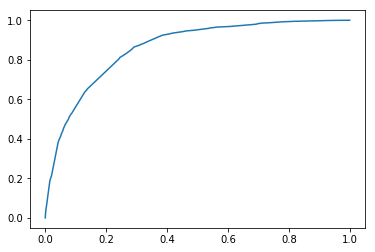

In [20]:
plt.plot( fpr, tpr )

In [21]:
from sklearn.metrics import auc

In [22]:
auc( fpr, tpr )

0.86067088464125263

### Выбираем тройку лучших параметров

In [23]:
#Делаем массив из названий всех столбцов
cols = data.columns.values
cols

array(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'], dtype=object)

In [24]:
#Делаем массив названий непрерывных столбцов
continuous_cols=['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [25]:
#Делаем массив названий столбцов с перечислимым набором значений
nominal_cols=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [26]:
#Запоминаем длинну выборки столбцов - 1 (последний столбец - целевая переменная)
l=cols.size - 1

#Заготовка под массив столбцов
c =[]

#Заготовка под массив столбцов перечислимых типов
nc = []

#Переменная под максимальное значение auc
bestAUC=0

#Лучшее занчение С
bestC=0

#Тип регуляризации
regul='A'

#В трех циклах последовательно проходим по столбцам и формируем тройки, для каждой трокий делаем get_dummies для 
#перечислимых переменных, строим модель и вычисляем score.
#В переменных maxValue и bestParams сохраняем значения лучщего score и набор параметров, для которого он получился
for i in range(0, l, 1):
    for j in range(i+1, l, 1):
        for k in range(j+1, l, 1):
            #Проверяем, что у нас нет одинаковых столбцов в выборке
            if cols[i]==cols[j] or cols[i]==cols[k] or cols[j]==cols[k]:
                break
                
            #Добавляем названия столбцов в выборку    
            c.append(cols[i])
            c.append(cols[j])
            c.append(cols[k])
            
            #Проверяем наличие перечислимых столбцов
            if cols[i] in nominal_cols:
                nc.append(cols[i])
            if cols[j] in nominal_cols:
                nc.append(cols[j])
            if cols[k] in nominal_cols:
                nc.append(cols[k])
            
            #Выделяем столбцы для эксперимента
            selectedColumns = data[[i for i in c]]
            cls=[i for i in nc]
            
           #Разделяем столбцы с перечислимыми переменными из выборки
            X = pd.get_dummies( selectedColumns, columns = cls)
            
            #model = LogisticRegression()
            
            #разбиваем на обучающую и тестовую выборки
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.9, random_state = 0)

            #В цикле смотрим значения для различных параметров С и регуляризации
            for i, C in enumerate((100, 1, 0.1, 0.01)):
                #Выбираем модель с С=С и регуляризацией L1
                model_l1 = LogisticRegression(C=C, penalty='l1')
                #Обучаем модешь
                model_l1.fit(X_train, Y_train)
                #Делаем предсказания
                predictions1=model_l1.predict_proba(X_test)
                #вычисляем roc curve
                fpr1, tpr1, thres1 = roc_curve( Y_test, predictions1[:, 1] )
                #Вычисляем auc
                auc1 = auc( fpr1, tpr1 )
                #Смотрим, является ли значение auc лучшим, если да, то сохраняем его
                if bestAUC<auc1:
                    bestAUC=auc1
                    regul='L1'
                    bestC=C
                    bestParams=c
                    bestFpr=fpr1
                    bestTpr=tpr1
                #Выбираем модель с С=С и регуляризацией L1
                model_l2 = LogisticRegression(C=C, penalty='l2')
                #Обучаем модешь
                model_l2.fit(X_train, Y_train)
                #Делаем предсказания
                predictions2=model_l2.predict_proba(X_test)
                #вычисляем roc curve
                fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
                #Вычисляем auc
                auc2 = auc( fpr2, tpr2 )
                #Смотрим, является ли значение auc лучшим, если да, то сохраняем его
                if bestAUC<auc2:
                    bestAUC=auc2
                    regul='L2'
                    bestC=C
                    bestParams=c
                    bestFpr=fpr2
                    bestTpr=tpr2
                       
            c=[]
            nc=[]
            
#Выводим лучшие параметры            
print('Лучший набор параметров: ', bestParams)
print('Значение AUC: ', bestAUC, 'получено при параметрах С:', bestC, 'и регуляризации:', regul)
print('')

Лучший набор параметров:  ['education', 'relationship', 'capital-gain']
Значение AUC:  0.878805620798 получено при параметрах С: 100 и регуляризации: L2



### 4 признака
Добавим к 3 лучшим признакам еще один и посмотрим, на сколько изменится значение AUC

In [27]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'workclass', 'education', 'relationship', 'capital-gain' ] ]
X = pd.get_dummies( selectedColumns, columns = [ 'workclass', 'education', 'relationship' ] )

#выбираем модель
model = LogisticRegression(C=100, penalty='l2')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.9, random_state = 0)
# обучаем модель
model.fit( X_train, Y_train )
# делаем предсказания
predictions4 = model.predict_proba( X_test )
# получаем значения false и true positive rate для различных значений порога
fpr4, tpr4, thres4 = roc_curve( Y_test, predictions4[:, 1] )
auc4 = auc( fpr4, tpr4 )
auc4

0.88248236926612433

### Нарисуем ROC AUC для всех рассчитанных нами случаев

In [53]:
#Немоного изменим параметры вывода графиков
rcParams['figure.figsize'] = 15,8

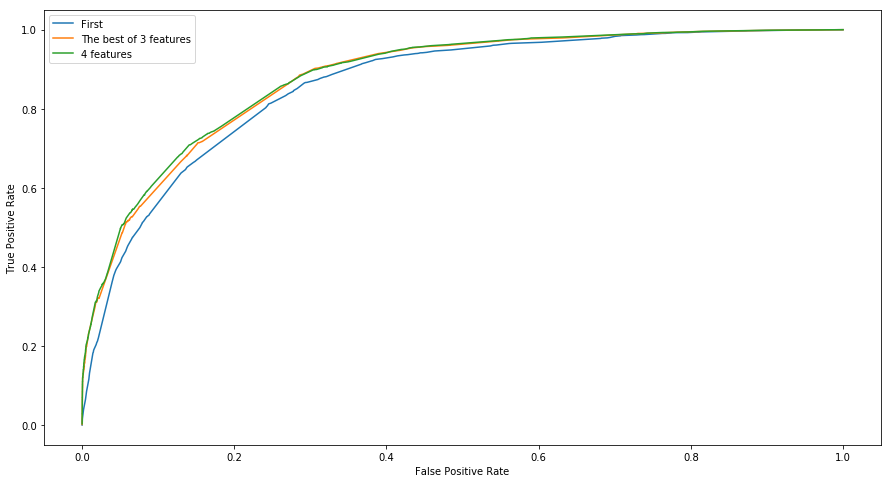

In [54]:
plt.plot( fpr, tpr, label = 'The first' )
plt.plot( bestFpr, bestTpr, label = 'The best of 3 features' )
plt.plot( fpr4, tpr4, label = '4 features')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()